# Rainfall Weather Forecasting

Problem statement:

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time.Here in this project we have to ,

a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.




 INDEPENDENT VARIABLES
 
Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am



Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

TARGET VARIABLE:

RainTomorrow -The amount of next day rain in mm. Used to create response variable 



We need to predict if the rain will fall or not. So we choose the RainTomorrow column as the target.


In [79]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
df=pd.read_csv('weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [2]:
#shape of the dataset
df.shape

(8425, 23)

In [4]:
#first five records
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
#last 5 records
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [6]:
#print the names of all columns
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
#print columns as list
df.columns.tolist()

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

In [8]:
#Index, Datatype and Memory information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

There are 16 float64  and 7 object variables are there in the data set. 

22 are independent variables and 1 target variable

In [9]:
#check null values
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

Date is in object data type here.we have to change into datetime data type

In [10]:
#spliting date into date, month and year.
df['Date']=pd.to_datetime(df['Date'])
df['Day']=df['Date'].apply(lambda x:x.day)
df['Month']=df['Date'].apply(lambda x:x.month)
df['Year']=df['Date'].apply(lambda x:x.year)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008


In [11]:
#check for duplicates
df.duplicated().sum()

1663

There are duplicates present in the dataset.we have to drop the duplicated values from the dataset using drop_duplicates method

In [12]:
#drop duplicate values
df.drop_duplicates()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,1020.3,NaN,NaN,10.1,22.4,No,No,21,6,2017
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,1019.1,NaN,NaN,10.9,24.5,No,No,22,6,2017
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,1016.8,NaN,NaN,12.5,26.1,No,No,23,6,2017
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,1016.5,3.0,2.0,15.1,26.0,No,No,24,6,2017


Missing value imputation using mean,median and mode method

In [13]:
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mode()[0])
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].median())
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mode()[0])

In [14]:
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].median())
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].median())
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())

In [15]:
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mode()[0])
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mode()[0])
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])                   
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [16]:
#check null values
df.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow        0
Day                 0
Month               0
Year                0
dtype: int64

In [17]:
#drop the columns with more null values
df.drop(columns='Evaporation',axis=1,inplace=True)
df.drop(columns='Sunshine',axis=1,inplace=True)

In [18]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,...,1020.3,NaN,NaN,10.1,22.4,No,No,21,6,2017
8421,2017-06-22,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,...,1019.1,NaN,NaN,10.9,24.5,No,No,22,6,2017
8422,2017-06-23,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,...,1016.8,NaN,NaN,12.5,26.1,No,No,23,6,2017
8423,2017-06-24,Uluru,7.8,27.0,0.0,SE,28.0,SSE,N,13.0,...,1016.5,3.0,2.0,15.1,26.0,No,No,24,6,2017


In [19]:
#statistical summary of the data
df.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
count,8425.000000,8425.000000,8425.000000,7434.000000,8425.000000,8425.000000,8425.000000,8425.000000,7116.000000,7113.000000,6004.000000,5970.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,13.182682,23.825365,2.725982,40.174469,13.840000,18.539585,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.742326,22.405982,15.741958,6.442136,2012.102433
std,5.380656,6.128159,10.319872,14.665721,10.128896,9.704899,16.774231,18.311894,6.828699,6.766681,2.877658,2.731659,5.613463,5.955804,8.787354,3.437994,2.473137
min,-2.000000,8.200000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,1.000000,1.000000,2008.000000
25%,9.300000,19.200000,0.000000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.100000,8.000000,3.000000,2010.000000
50%,13.200000,23.200000,0.000000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.700000,21.800000,16.000000,6.000000,2011.000000
75%,17.300000,28.000000,0.800000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.300000,23.000000,9.000000,2014.000000
max,28.500000,45.500000,371.000000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,31.000000,12.000000,2017.000000


<AxesSubplot:>

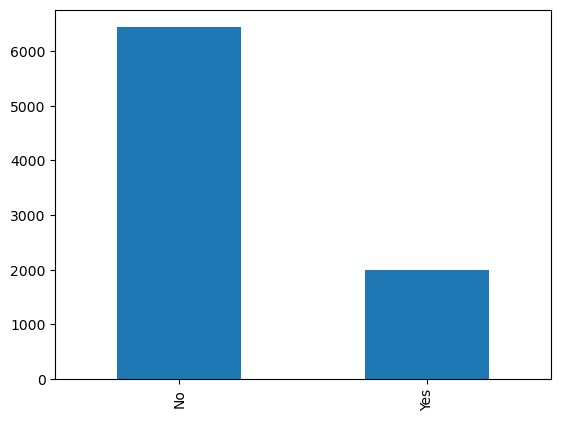

In [20]:
df['RainTomorrow'].value_counts().plot.bar()

<AxesSubplot:>

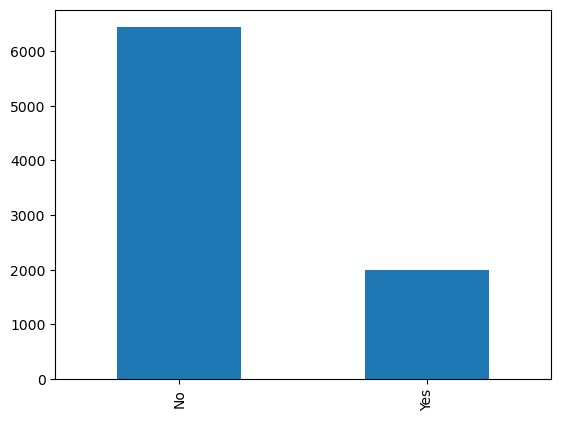

In [21]:
df['RainToday'].value_counts().plot.bar()

Present Temperature using histogram

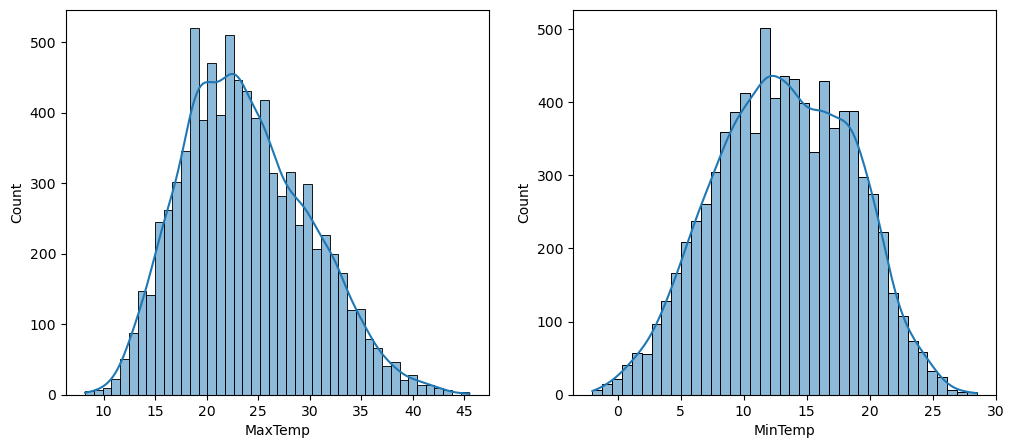

In [22]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['MaxTemp'],kde=True)
plt.subplot(1,2,2)
sns.histplot(df['MinTemp'],kde=True)
plt.show()

From the above plot,we can see that Present Temperature Maximum varies between(20 to 30 degree) Present Temperature Minimum varies between (11 to 20 degree)

In [23]:
df['MaxTemp'].min()

8.2

In [24]:
df['MinTemp'].max()

28.5

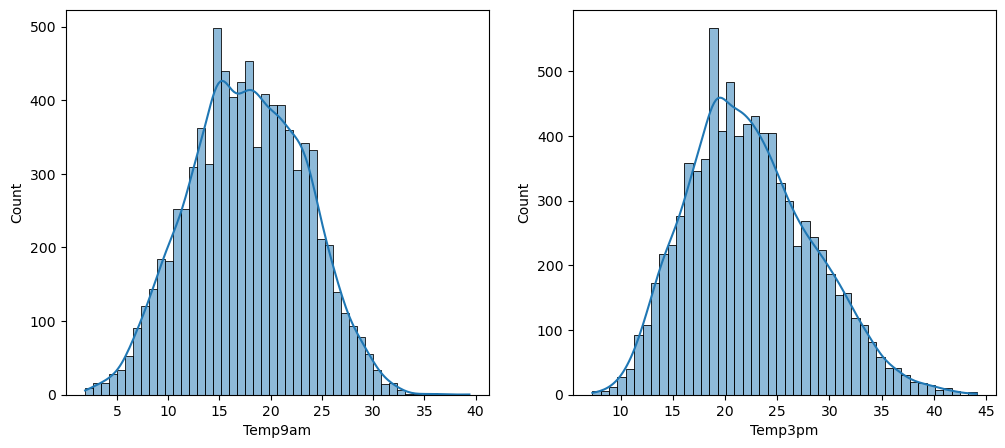

In [25]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Temp9am'],kde=True)
plt.subplot(1,2,2)
sns.histplot(df['Temp3pm'],kde=True)
plt.show()

In [26]:
df['Temp9am'].min()

1.9

In [27]:
df['Temp3pm'].min()

7.3

In [28]:
df.loc[df.MaxTemp==df.MaxTemp.max()]

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
3302,2017-02-11,Williamtown,25.0,45.5,0.0,SSW,43.0,WSW,WSW,7.0,...,1002.6,NaN,NaN,27.3,43.9,No,No,11,2,2017
4154,2017-02-11,Williamtown,25.0,45.5,0.0,SSW,43.0,WSW,WSW,7.0,...,1002.6,NaN,NaN,27.3,43.9,No,No,11,2,2017


williamtown location have min and max temperature are same 

<AxesSubplot:xlabel='Location', ylabel='MaxTemp'>

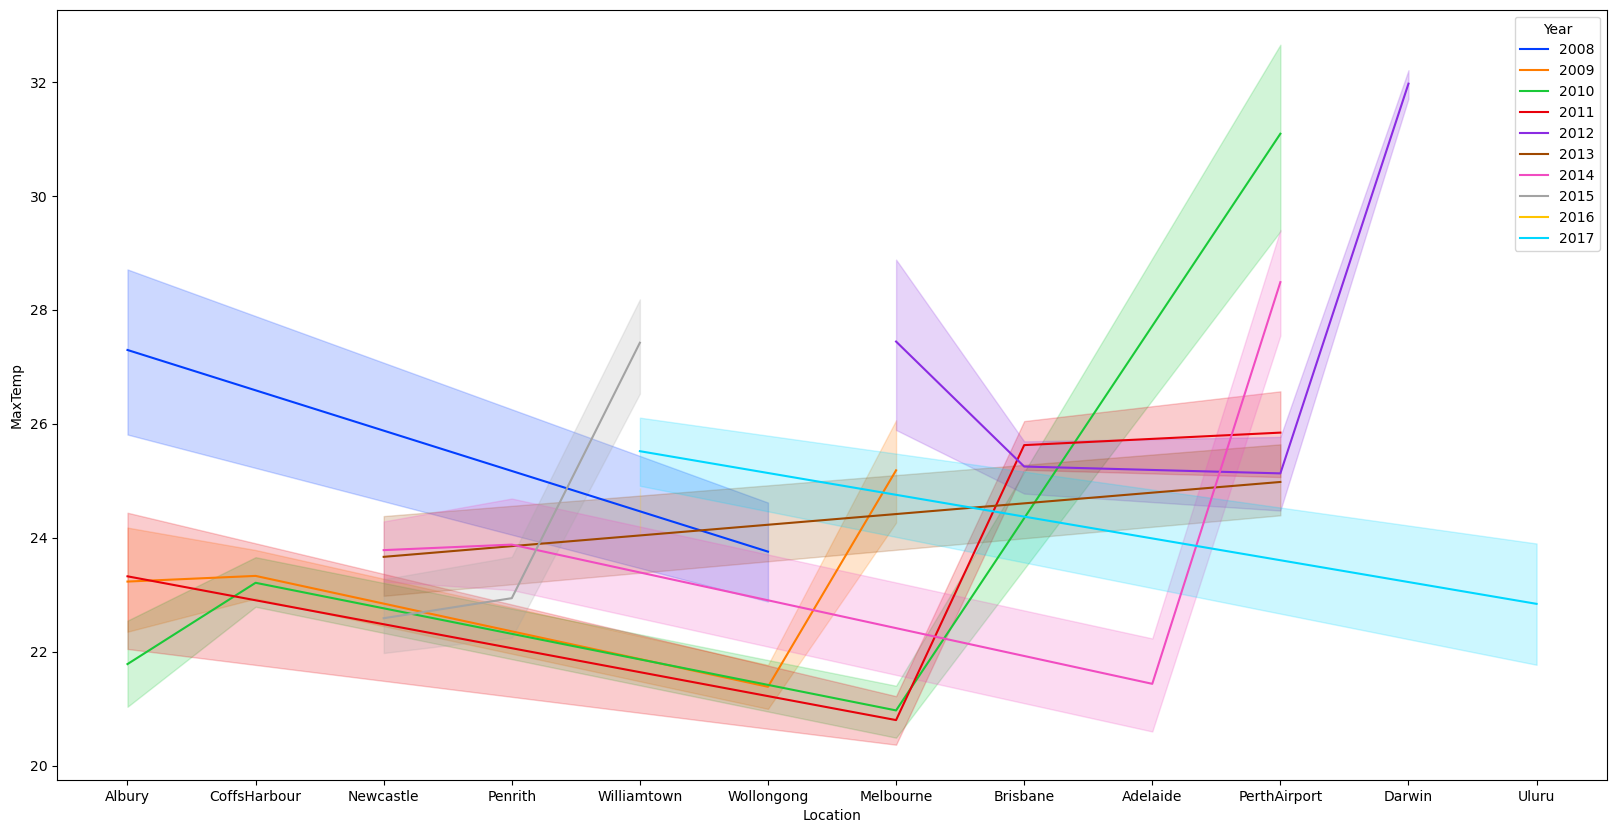

In [29]:
plt.figure(figsize=(20,10))
sns.lineplot(x=df['Location'], y=df['MaxTemp'],hue=df['Year'],palette="bright")

Maximum temperature - Darwin location in the year 2012 about 32 degree

Minimum Temperature -Albury location in the year 2010 about 21 degree

<AxesSubplot:xlabel='Location', ylabel='MinTemp'>

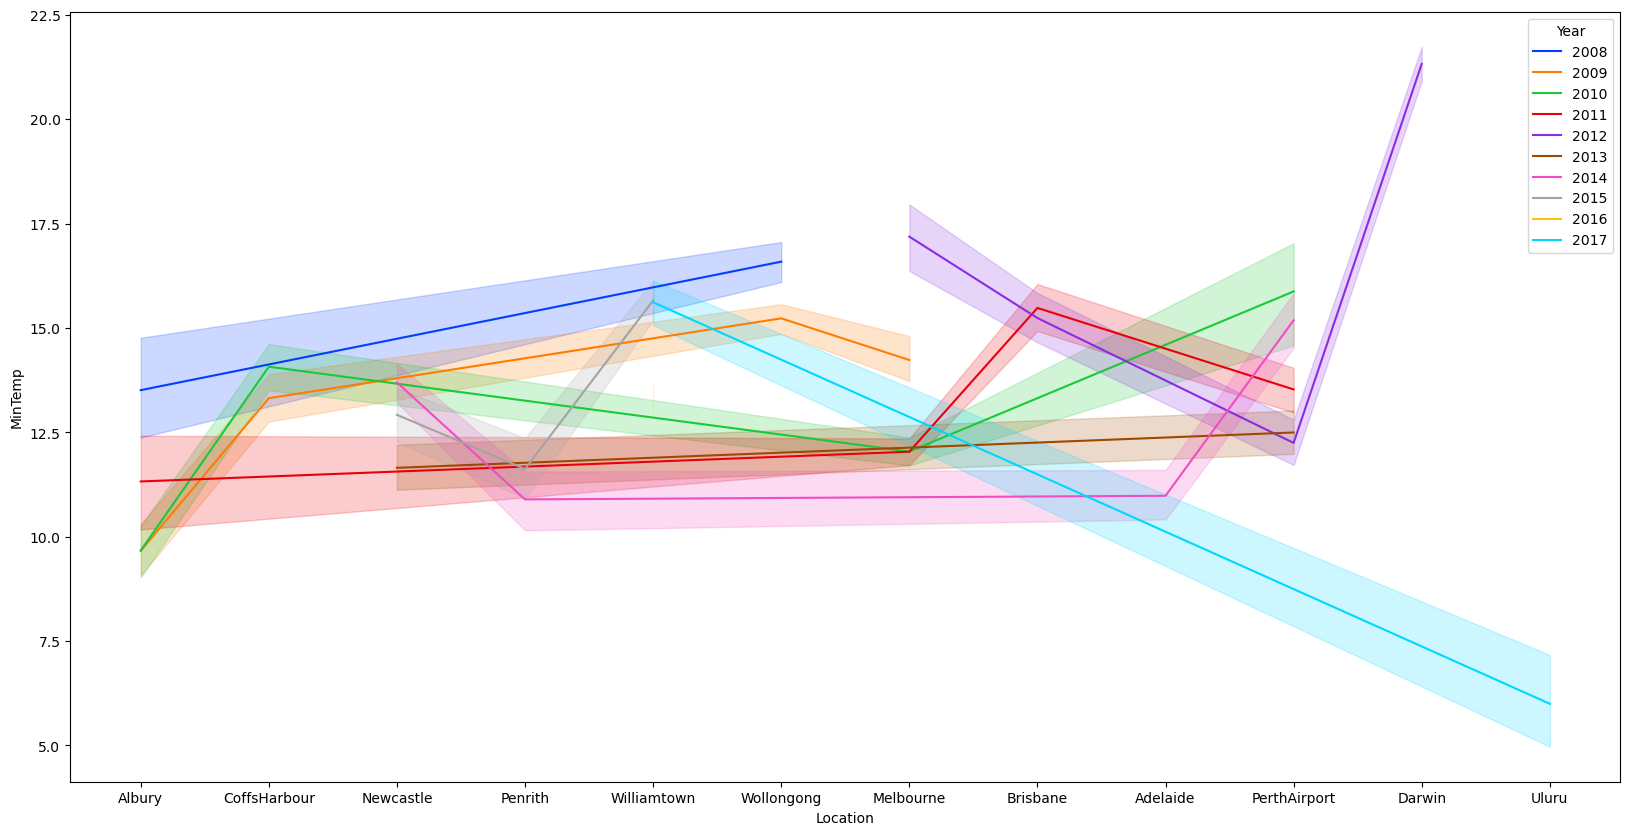

In [29]:
plt.figure(figsize=(20,10))
sns.lineplot(x=df['Location'], y=df['MinTemp'],hue=df['Year'],palette="bright")

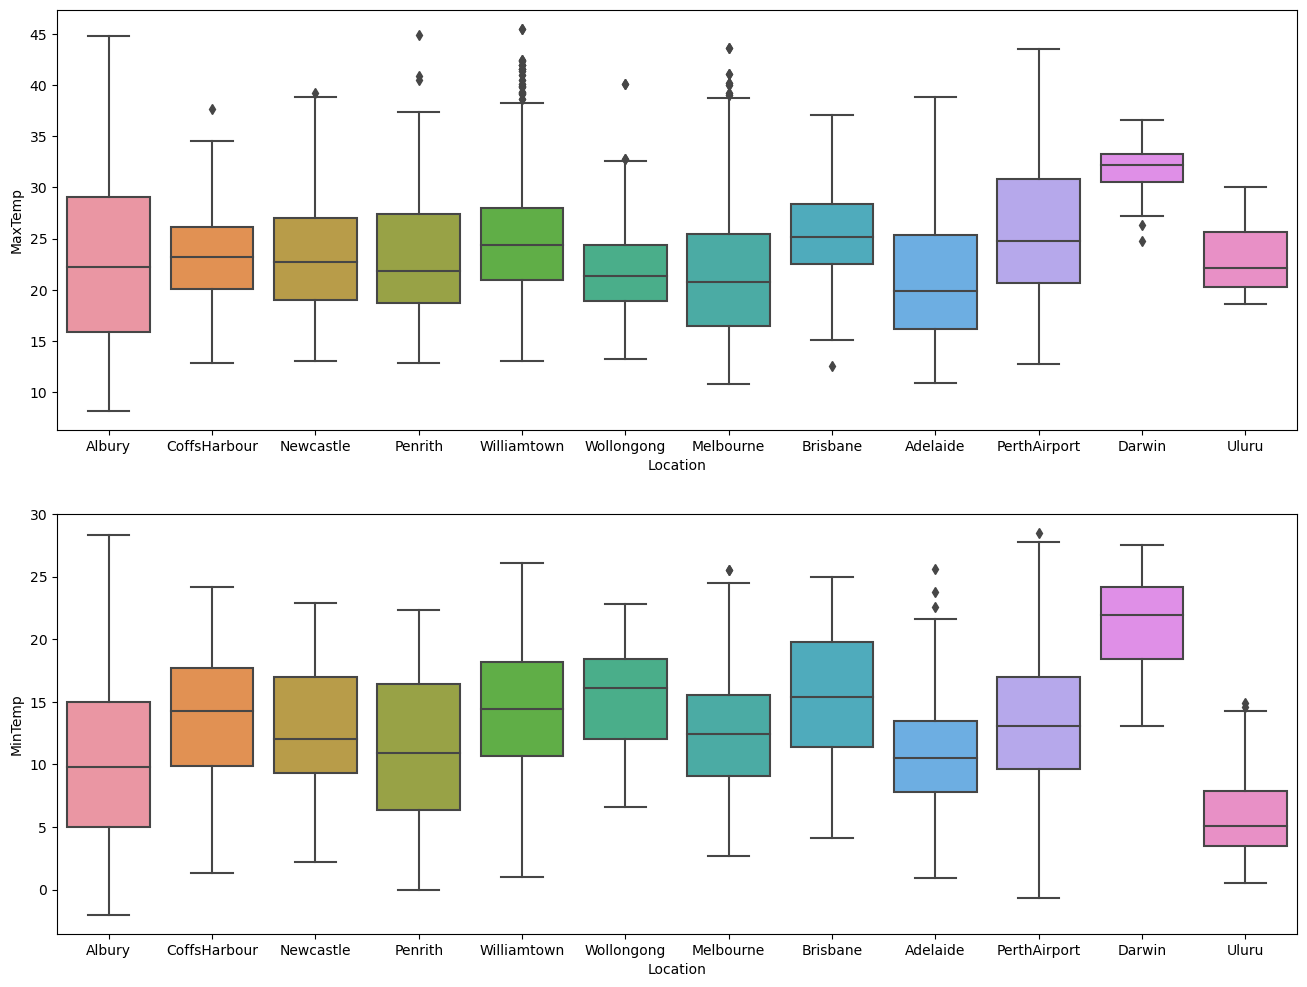

In [30]:
plt.figure(figsize=(16,12))
plt.subplot(2,1,1)
sns.boxplot(x=df['Location'],y=df['MaxTemp'],data=df)
plt.subplot(2,1,2)
sns.boxplot(x=df['Location'],y=df['MinTemp'],data=df)
plt.show()

Max Temperature is in location Albury and Min Temperature in Uluru

<AxesSubplot:xlabel='WindGustDir', ylabel='RainTomorrow'>

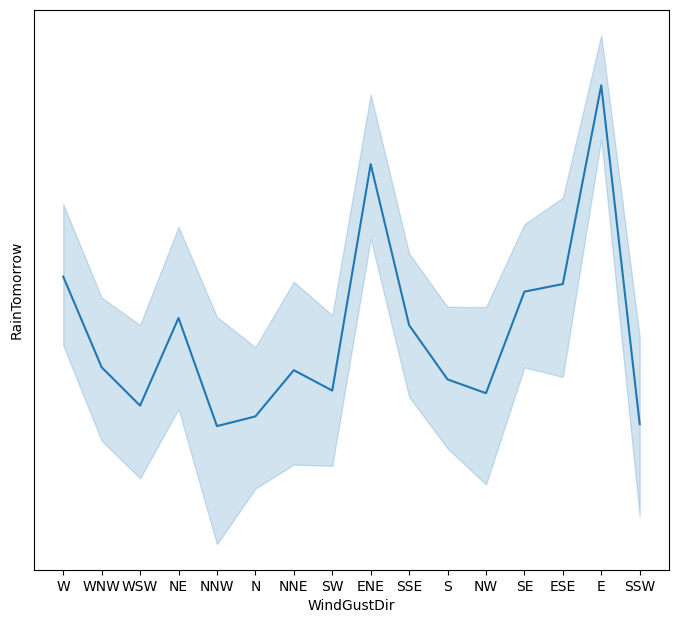

In [81]:
plt.figure(figsize=(18,16))
plt.subplot(2,2,1)
sns.lineplot(x='WindGustDir',y='RainTomorrow',data=df)

<AxesSubplot:xlabel='WindGustSpeed', ylabel='RainTomorrow'>

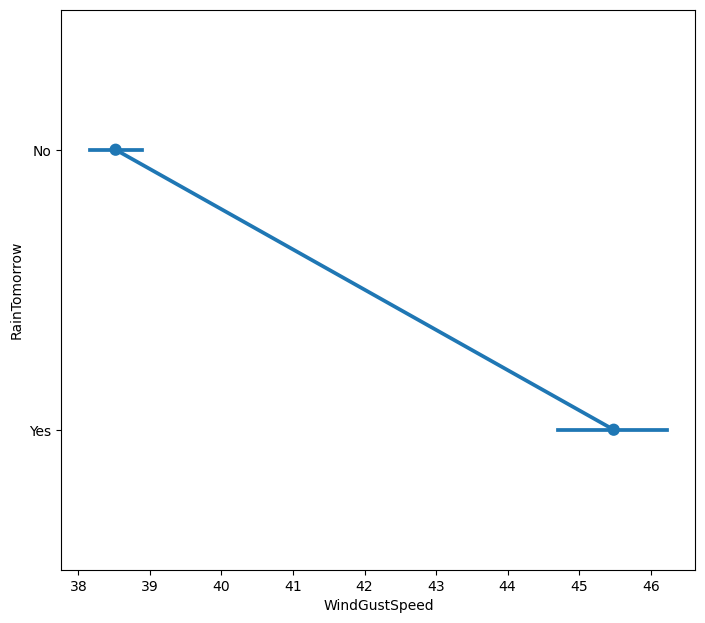

In [32]:
plt.figure(figsize=(18,16))
plt.subplot(2,2,1)
sns.pointplot(x='WindGustSpeed',y='RainTomorrow',data=df)

WindGustSpeed have not much impact on Rain tomorrow

<AxesSubplot:xlabel='Year', ylabel='Rainfall'>

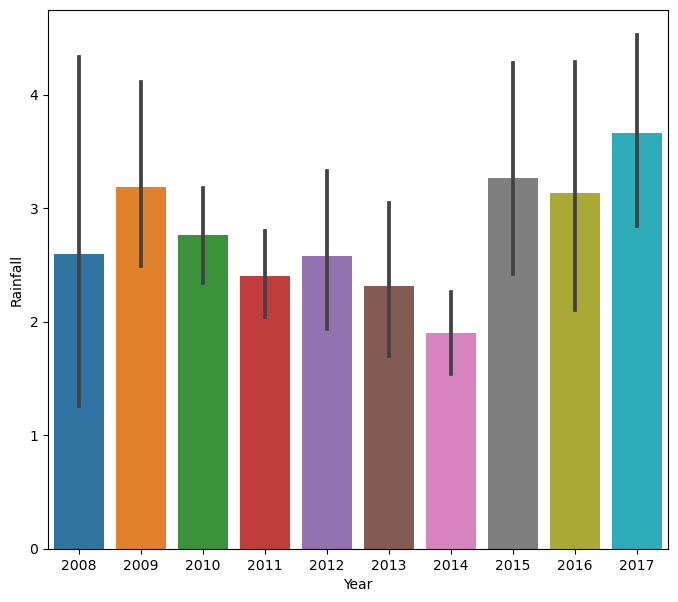

In [32]:
plt.figure(figsize=(8,7))
sns.barplot(y=df['Rainfall'], x=df['Year'])

Highest Rainfall is in the year 2008 and less rainfall in 2014

In [33]:
# Droping unnecessary columns
df.drop(['Date'], axis=1, inplace=True)

In [34]:
df.shape

(8425, 23)

In [35]:
# Separating  categorical variable
category=df.select_dtypes(include=['object']).columns

In [36]:
category

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

In [37]:
# Separating  numerical variable
num=df._get_numeric_data().columns
num

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Day',
       'Month', 'Year'],
      dtype='object')

In [38]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in category:
    df[i] = le.fit_transform(df[i])
df

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,...,1007.1,8.0,NaN,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,...,1007.8,NaN,NaN,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,...,1008.7,NaN,2.0,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,...,1012.8,NaN,NaN,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,...,1006.0,7.0,8.0,17.8,29.7,0,0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.4,0.0,0,31.0,9,1,13.0,11.0,...,1020.3,NaN,NaN,10.1,22.4,0,0,21,6,2017
8421,9,3.6,25.3,0.0,6,22.0,9,3,13.0,9.0,...,1019.1,NaN,NaN,10.9,24.5,0,0,22,6,2017
8422,9,5.4,26.9,0.0,3,37.0,9,14,9.0,9.0,...,1016.8,NaN,NaN,12.5,26.1,0,0,23,6,2017
8423,9,7.8,27.0,0.0,9,28.0,10,3,13.0,7.0,...,1016.5,3.0,2.0,15.1,26.0,0,0,24,6,2017


In [39]:
df.dtypes

Location           int32
MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir        int32
WindGustSpeed    float64
WindDir9am         int32
WindDir3pm         int32
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int32
RainTomorrow       int32
Day                int64
Month              int64
Year               int64
dtype: object

In [40]:
df_proc = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])
df_proc

,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,WindDir3pm_7,WindDir3pm_8,WindDir3pm_9,WindDir3pm_10,WindDir3pm_11,WindDir3pm_12,WindDir3pm_13,WindDir3pm_14,WindDir3pm_15,WindDir3pm_16
0,1,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,...,0,0,0,0,0,0,0,1,0,0
1,1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,...,0,0,0,0,0,0,0,0,1,0
2,1,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,...,0,0,0,0,0,0,0,0,1,0
3,1,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,...,0,0,0,0,0,0,0,0,0,0
4,1,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.4,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,...,0,0,0,0,0,0,0,0,0,0
8421,9,3.6,25.3,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,...,0,0,0,0,0,0,0,0,0,0
8422,9,5.4,26.9,0.0,37.0,9.0,9.0,53.0,24.0,1021.0,...,0,0,0,0,0,0,0,1,0,0
8423,9,7.8,27.0,0.0,28.0,13.0,7.0,51.0,24.0,1019.4,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df_proc.replace(['No', 'Yes'], [0,1], inplace=True)
df_proc[['RainTomorrow']]

,RainTomorrow
0,0
1,0
2,0
3,0
4,0
...,...
8420,0
8421,0
8422,0
8423,0


In [42]:
df['RainTomorrow'].value_counts()

0    6434
1    1991
Name: RainTomorrow, dtype: int64

We need to predict if the rain will fall or not. So we choose the RainTomorrow column as the target.

# Machine Learning Model Building 

In [43]:
# Splitting data in target and dependent feature
X = df.drop(['RainTomorrow'], axis =1)
Y = df['RainTomorrow']

In [44]:
#TO DROP NULL VALUES 
X1=X.dropna(axis=1)

In [45]:
X1

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,Day,Month,Year
0,1,13.4,22.9,0.6,13,13,14,20.0,24.0,71.0,22.0,16.9,21.8,0,1,12,2008
1,1,7.4,25.1,0.0,14,6,15,4.0,22.0,44.0,25.0,17.2,24.3,0,2,12,2008
2,1,12.9,25.7,0.0,15,13,15,19.0,26.0,38.0,30.0,21.0,23.2,0,3,12,2008
3,1,9.2,28.0,0.0,4,9,0,11.0,9.0,45.0,16.0,18.1,26.5,0,4,12,2008
4,1,17.5,32.3,1.0,13,1,7,7.0,20.0,82.0,33.0,17.8,29.7,0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.4,0.0,0,9,1,13.0,11.0,51.0,24.0,10.1,22.4,0,21,6,2017
8421,9,3.6,25.3,0.0,6,9,3,13.0,9.0,56.0,21.0,10.9,24.5,0,22,6,2017
8422,9,5.4,26.9,0.0,3,9,14,9.0,9.0,53.0,24.0,12.5,26.1,0,23,6,2017
8423,9,7.8,27.0,0.0,9,10,3,13.0,7.0,51.0,24.0,15.1,26.0,0,24,6,2017


In [46]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
8420    0
8421    0
8422    0
8423    0
8424    0
Name: RainTomorrow, Length: 8425, dtype: int32

# MODEL BUILDING

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

# LINEAR REGRESSION

In [49]:
x_train, x_test, y_train, y_test = train_test_split(X1, Y, test_size=0.2, random_state=10)

In [50]:
LinearReg = LinearRegression()
LinearReg.fit(x_train, y_train)

LinearRegression()

In [54]:
predictions = LinearReg.predict(x_test)

In [60]:
import sklearn.metrics as metrics
MAE = metrics.mean_absolute_error(predictions, y_test)
MSE = metrics.mean_squared_error(predictions, y_test)
R2SCORE = metrics.r2_score(predictions, y_test)
print('MEAN ABSOLUTER ERROR:',MAE)
print('MEAN SQUARE ERROR:',MSE)
print('R2SCORE:',R2SCORE)

MEAN ABSOLUTER ERROR: 0.28248404540512184
MEAN SQUARE ERROR: 0.13247964681211502
R2SCORE: -1.7251579601814409


In [74]:
print('Accuracy Score: ', accuracy_score(y_test, predictions))

Accuracy Score:  0.8338278931750742


# Decision Tree

In [68]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 8)
Tree.fit(x_train,y_train)
predictions = Tree.predict(x_test)

In [76]:
print('Accuracy Score: ', accuracy_score(y_test, predictions))

Accuracy Score:  0.8338278931750742


# LOGISTIC REGRESSION

In [77]:
Log = LogisticRegression(solver='liblinear')
Log.fit(x_train,y_train)
predictions = Log.predict(x_test)
print('Accuracy Score: ', accuracy_score(y_test, predictions))

Accuracy Score:  0.8243323442136499


DECISION TREE  is  the best model for predicting rainfall with 83 percent accuracy